NAME: DEV AGARWAL REG NO: 220968019 SECTION: A ROLL NO: 06 BATCH: 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
data = pd.read_csv('manufacturing.csv')
df = pd.DataFrame(data)
df.head()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000


UNDERSTANDING THE DATA

In [3]:
df.shape

(3957, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3957 entries, 0 to 3956
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Temperature (°C)                3957 non-null   float64
 1   Pressure (kPa)                  3957 non-null   float64
 2   Temperature x Pressure          3957 non-null   float64
 3   Material Fusion Metric          3957 non-null   float64
 4   Material Transformation Metric  3957 non-null   float64
 5   Quality Rating                  3957 non-null   float64
dtypes: float64(6)
memory usage: 185.6 KB


In [5]:
df.isnull().sum()

Temperature (°C)                  0
Pressure (kPa)                    0
Temperature x Pressure            0
Material Fusion Metric            0
Material Transformation Metric    0
Quality Rating                    0
dtype: int64

In [6]:
df = df.drop_duplicates()

<Axes: >

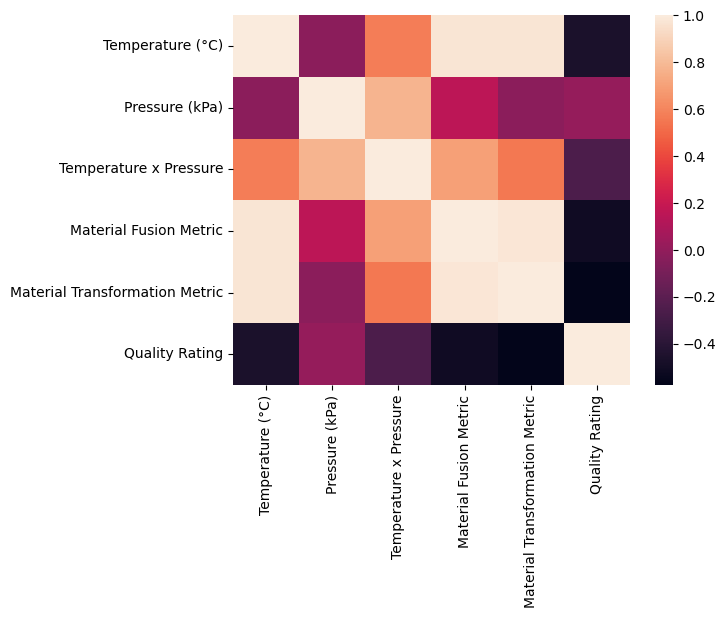

In [7]:
sns.heatmap(df.corr())

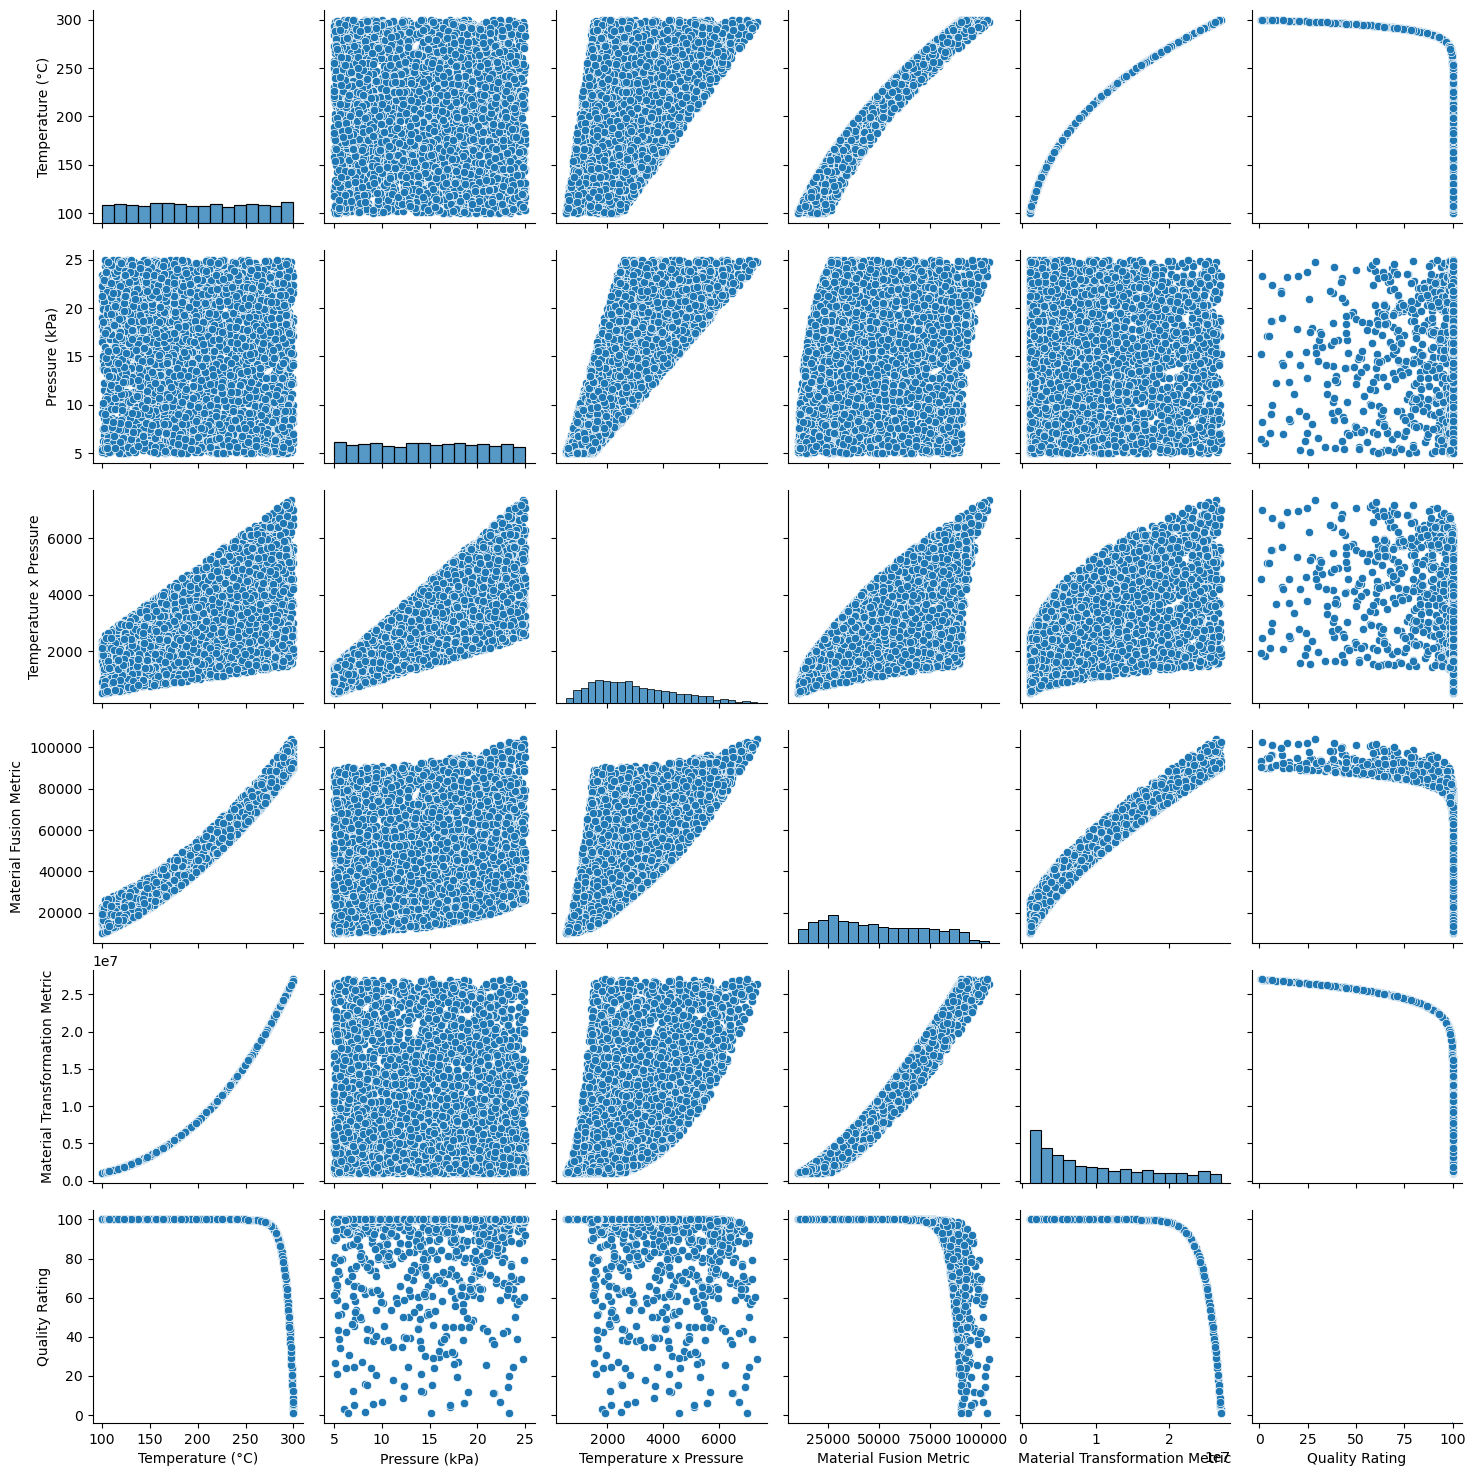

In [8]:
sns.pairplot(df)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [10]:
X = df.drop('Quality Rating', axis = 1)
y = df[['Quality Rating']]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

POLYNOMIAL REGRESSION

In [12]:
poly_reg = PolynomialFeatures(degree=5)
x_poly = poly_reg.fit_transform(X_train)
lin_reg = LinearRegression()
lin_reg.fit(x_poly,y_train)

LinearRegression()

In [13]:
y_pred = lin_reg.predict(poly_reg.fit_transform(X_test))

EVALUATION METRICS

In [14]:
print("Mean Squared Error is: ",mean_squared_error(y_pred,y_test))

Mean Squared Error is:  0.3438186849758431


In [15]:
print("Root Mean Squared Error is: ",math.sqrt(mean_squared_error(y_pred,y_test)))

Root Mean Squared Error is:  0.5863605417964642


In [16]:
print("Mean Absolute Error is: ",mean_absolute_error(y_pred,y_test))

Mean Absolute Error is:  0.3686016303437896


In [18]:
rmse = []
for x in range(1,11):
    poly_reg = PolynomialFeatures(degree=x)
    x_poly = poly_reg.fit_transform(X_train)
    lin_reg = LinearRegression()
    lin_reg.fit(x_poly,y_train)
    y_pred = lin_reg.predict(poly_reg.fit_transform(X_test))
    print(f"RMSE for degree {x} is: ",math.sqrt(mean_squared_error(y_pred,y_test)))
    rmse.append(math.sqrt(mean_squared_error(y_pred,y_test)))

RMSE for degree 1 is:  9.929937110748718
RMSE for degree 2 is:  3.9222462035401864
RMSE for degree 3 is:  2.2354044307734
RMSE for degree 4 is:  1.1790690313944425
RMSE for degree 5 is:  0.5863605417964642
RMSE for degree 6 is:  0.42137247998976846
RMSE for degree 7 is:  0.22492154847617118
RMSE for degree 8 is:  0.12758515642010293
RMSE for degree 9 is:  0.05462312296958094
RMSE for degree 10 is:  0.02155001719517702


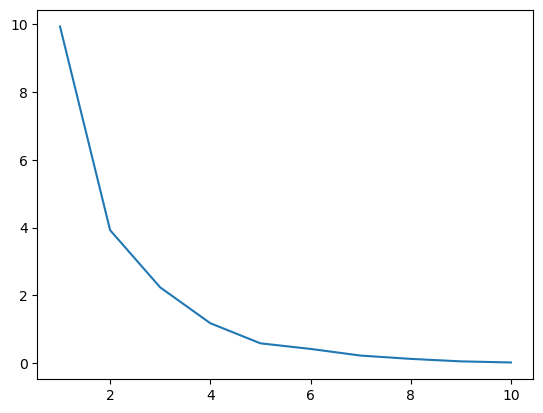

In [19]:
plt.plot(range(1,11),rmse)